<a href="https://colab.research.google.com/github/LFormigon/FIAP/blob/main/Produ%C3%A7%C3%A3o_Hospitalar_An%C3%A1lise_explorat%C3%B3ria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando Dados de produção Hospitalar

In [ ]:
nome = 'guilherme'

In [ ]:
print(nome)

guilherme


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd #1ª célula

dados = pd.read_csv('/content/A150850189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',') #2ª célula

#Desafio

dados['2008/Ago'].mean()


<ipython-input-19-ad265d65239e>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv('/content/A150850189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',') #2ª célula


np.float64(26645398.35703704)

<Axes: xlabel='Unidade da Federação'>

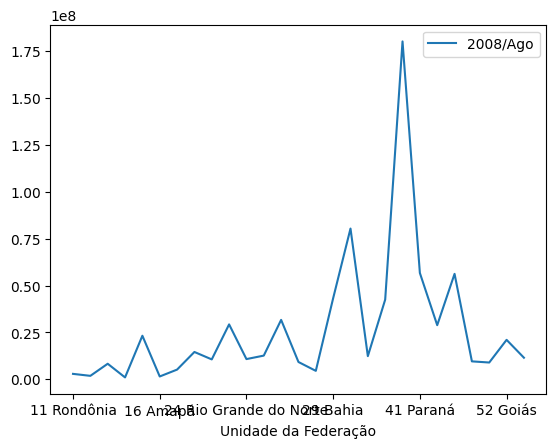

In [ ]:
dados.plot(x='Unidade da Federação', y='2008/Ago')

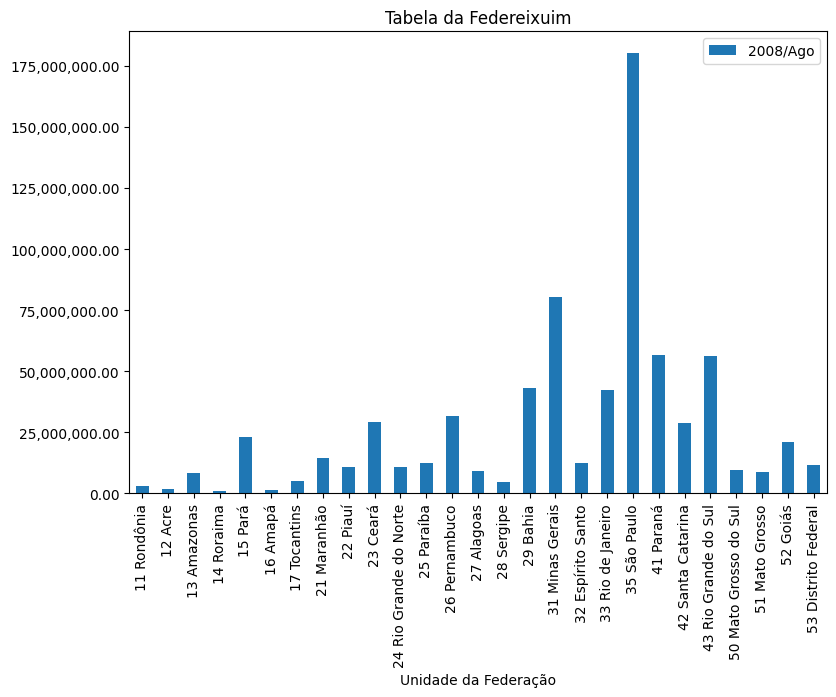

In [ ]:
#Basicamente a Biblioteca matplotlib é uma biblioteca que nos auxilia na visualização de dados, Portanto, vamos utilizar varias vezes

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

#Kind (tipo de tabela)  figsize (tamanho da tabela)

axis = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))

#Axis seria um "eixo" para as tabelas (StrMethodFormatter) seria a formatação da tabela

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))


#Definindo o nome da nossa tabela

plt.title('Tabela da Federeixuim')

#Exibindo o nome da nossa Tabela
plt.show()

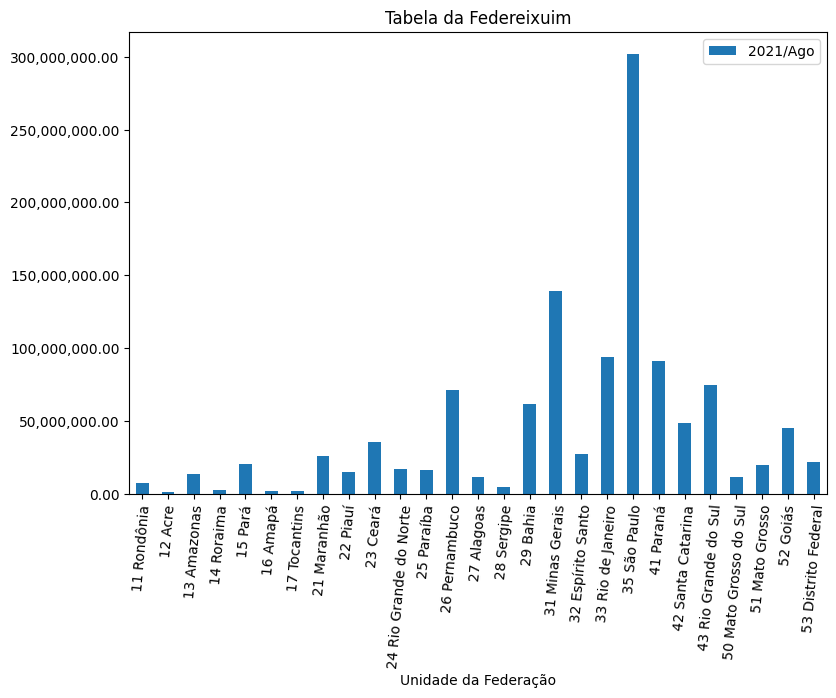

In [ ]:
#Desafio Aula 02 (Fazer uma tabela como no exercicio anterior só que com os dados mais atualizados, E deixa as unidades de federação com as letras inclinidas com algum grau)

#Basicamente a Biblioteca matplotlib é uma biblioteca que nos auxilia na visualização de dados, Portanto, vamos utilizar varias vezes

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker



#Axis seria um "eixo" para as tabelas (StrMethodFormatter) seria a formatação da tabela

#Kind (tipo de tabela)  figsize (tamanho da tabela)

axis = dados.plot(x='Unidade da Federação', y='2021/Ago', kind='bar', figsize=(9,6))

#em Axis estamos formantando a tabela para aparecer somente 2 casas após o '.' e exibindo os valores corretos apos a ','

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# em Axis na nossa tabela o campo "x" seria nossa unidade de federação (nome dos estados) caso eu queria deixar os nomes apresentado com alguma inclinição de grau esse seria o metado:

axis.set_xticklabels(axis.get_xticklabels(), rotation=85)


#Definindo o nome da nossa tabela

plt.title('Tabela da Federeixuim')

#Exibindo o nome da nossa Tabela
plt.show()


In [ ]:
#Selecionado as colunas no qual eu quero trabalhar (O comando .head por padrão ele vai trazar as 5 primeiras linhas para que possamos trabalho
#porem, podemos aumentar a quantida de linhas caso desejar dentro do parametro)

dados[["2008/Ago", "2008/Set"]].head ()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [ ]:
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai', '2021/Jun',
       '2021/Jul', '2021/Ago', '2021/Set', 'Total'],
      dtype='object', length=293)

In [ ]:
#Ao visualizar nosso dataframe podemos visualizar que existe algumas cedulas que estão com os valores vazios e alguns anos sem valores, portanto, como desejamos puxar somente as colunas#qu
#que estejam totalmente preenchidas, iremos utilizar esse codigo (mean) eu descubro a media e através dela eu consigo visualizar as colunas que podemos utilizar (index) descubro o nome
#das colunas e com o tolist eu transformo em uma list ade python

# colunas_usaveis = dados.mean().index.tolist() #metodo do professor

colunas_usaveis = dados.select_dtypes(include=['number']).columns.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação') #adicionando nome a minha lista
colunas_usaveis[:5] #imprimindo somente os 5 primeiros elementos

['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov']

In [ ]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.088060e+09
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.061943e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.525463e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.968812e+09


In [ ]:
#adicionando nome a tabela

#dados_usaveis = dados_usaveis.set_index("Unidade da Federação") metodo do professor não funcionou

dados_usaveis.columns = dados_usaveis.columns.str.strip() #Remove espaços da tabela
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.088060e+09
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.061943e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.525463e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.968812e+09


In [ ]:
dados_usaveis['2019/Ago']

,2019/Ago
0,8.909112e+06
1,2.981073e+06
2,1.649372e+07
3,3.181322e+06
4,3.646201e+07
5,2.173061e+06
6,7.140063e+06
7,3.137493e+07
8,1.784895e+07
9,5.167259e+07


In [ ]:
#com o (loc) conseguimos pesquisar por qualquer indice na nossa tabela e por [] a gente faz por colunas

#dados_usaveis = dados_usaveis.set_index("Unidade da Federação") #erro ao reset
dados_usaveis.loc["12 Acre"]

,12 Acre
2007/Ago,1.047007e+04
2007/Set,1.400171e+04
2007/Out,8.620085e+04
2007/Nov,3.013237e+05
2007/Dez,7.696124e+05
...,...
2021/Mai,4.326882e+06
2021/Jun,3.458187e+06
2021/Jul,2.302711e+06
2021/Ago,1.196755e+06


<Axes: xlabel='Unidade da Federação'>

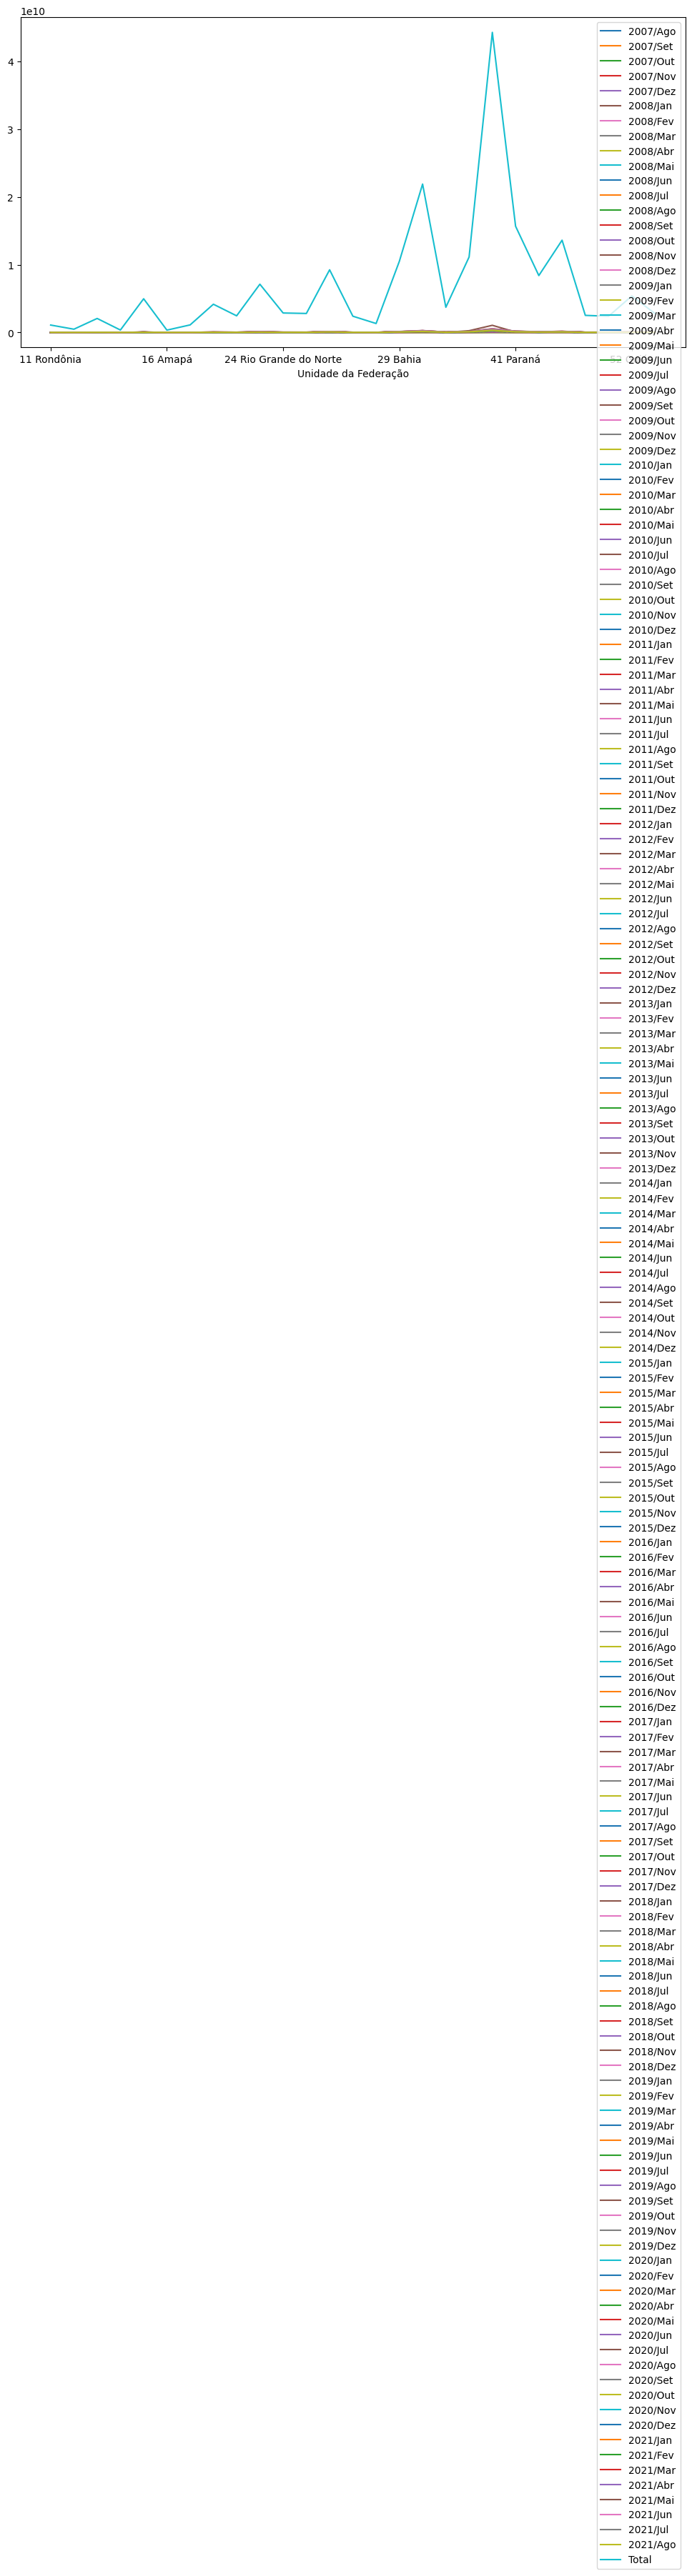

In [ ]:
dados_usaveis.plot(figsize=(12,6))

In [ ]:
#Oque era linha vira coluna e oque era coluna vira linha (invertamos o padrão da tabela)

dados_usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<Axes: >

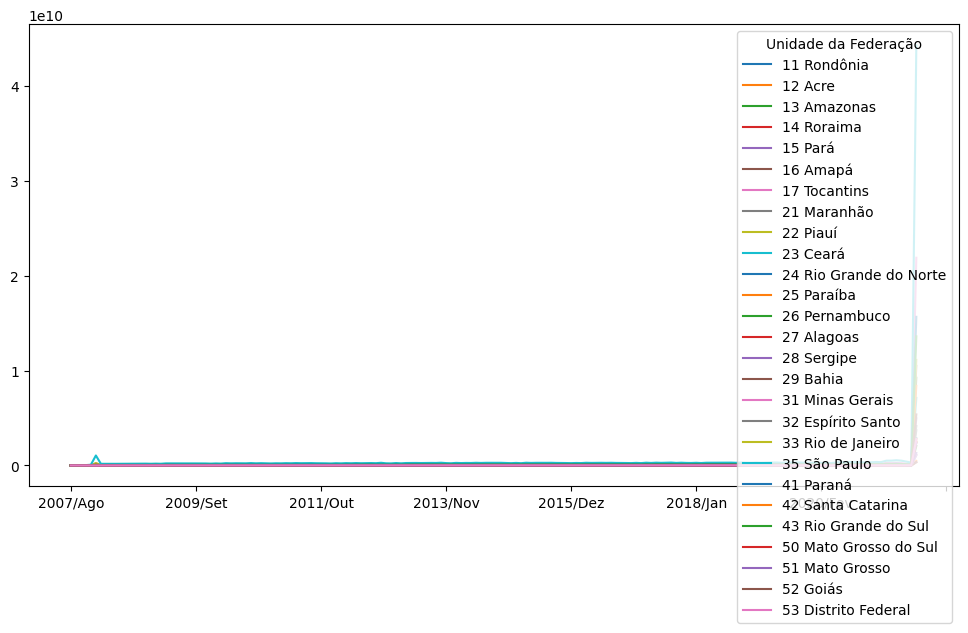

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))

In [ ]:
#No grafico acima podemos perceber que no final a linha acaba subindo bastante, E se observarmos no nosso data frame existe o campo "total" e por isso tem esse salto

dados_usaveis.T.tail() #para visualizar os dados (tail) e para exibir as ultimas 5 linhas do datafreme

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2021/Mai,1.765986e+07,4.326882e+06,2.397354e+07,3.681418e+06,5.090723e+07,5.672087e+06,1.016178e+07,5.532468e+07,3.255078e+07,1.028260e+08,...,5.734537e+07,1.453727e+08,5.481127e+08,1.918616e+08,1.016615e+08,1.550843e+08,3.688563e+07,3.785947e+07,6.946733e+07,3.243456e+07
2021/Jun,1.443590e+07,3.458187e+06,2.217540e+07,3.475206e+06,4.387659e+07,5.469150e+06,6.349488e+06,5.195857e+07,2.601580e+07,8.191945e+07,...,4.813767e+07,1.249090e+08,5.031610e+08,1.635809e+08,9.305577e+07,1.428123e+08,3.159520e+07,3.493713e+07,6.716235e+07,2.719646e+07
2021/Jul,1.183444e+07,2.302711e+06,2.161494e+07,3.320808e+06,3.371808e+07,4.136951e+06,4.610171e+06,3.777543e+07,1.997285e+07,5.772714e+07,...,3.655087e+07,1.136609e+08,4.043732e+08,1.194080e+08,7.053197e+07,1.128054e+08,2.071197e+07,2.936420e+07,5.789129e+07,2.626552e+07
2021/Ago,7.371335e+06,1.196755e+06,1.380696e+07,2.907871e+06,2.083787e+07,1.875242e+06,2.304080e+06,2.577967e+07,1.522089e+07,3.565001e+07,...,2.712745e+07,9.413736e+07,3.019863e+08,9.118772e+07,4.888500e+07,7.495459e+07,1.130299e+07,1.984925e+07,4.493982e+07,2.215644e+07
Total,1.088060e+09,4.752903e+08,2.061943e+09,3.525463e+08,4.968812e+09,3.371820e+08,1.110345e+09,4.161326e+09,2.450509e+09,7.118540e+09,...,3.710942e+09,1.113187e+10,4.429079e+10,1.567216e+10,8.392939e+09,1.361334e+10,2.516383e+09,2.386584e+09,5.380179e+09,2.778457e+09


<Axes: >

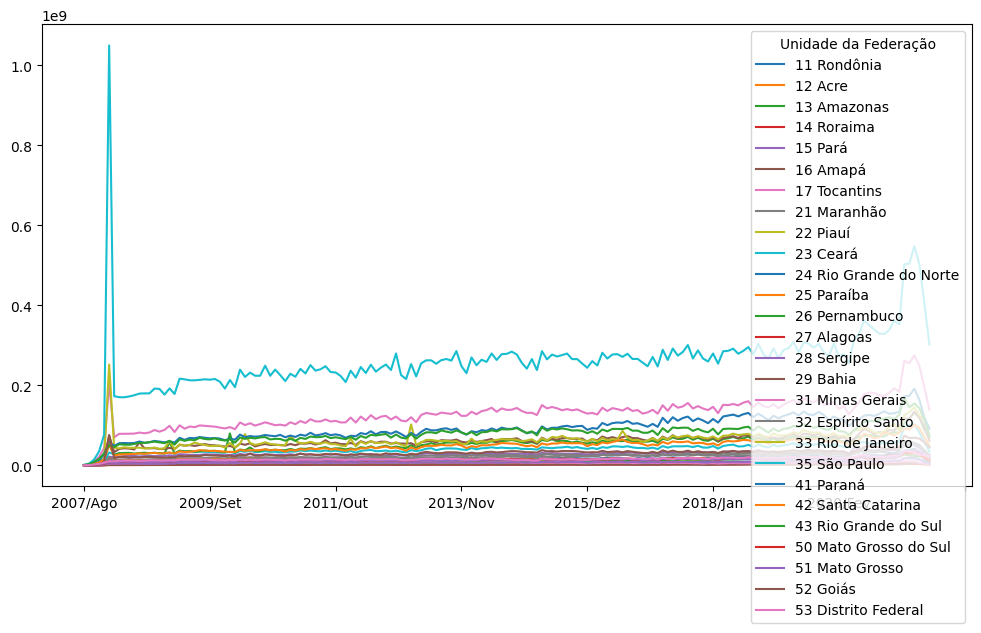

In [ ]:
#nessa linha de codido estamos removendo o "Total" da nossa tabela utikizando o axis (0 seria a coluna) (1 seria a linha)

dados_usaveis.drop('Total', axis=1).T.plot(figsize=(12,6))

<Axes: >

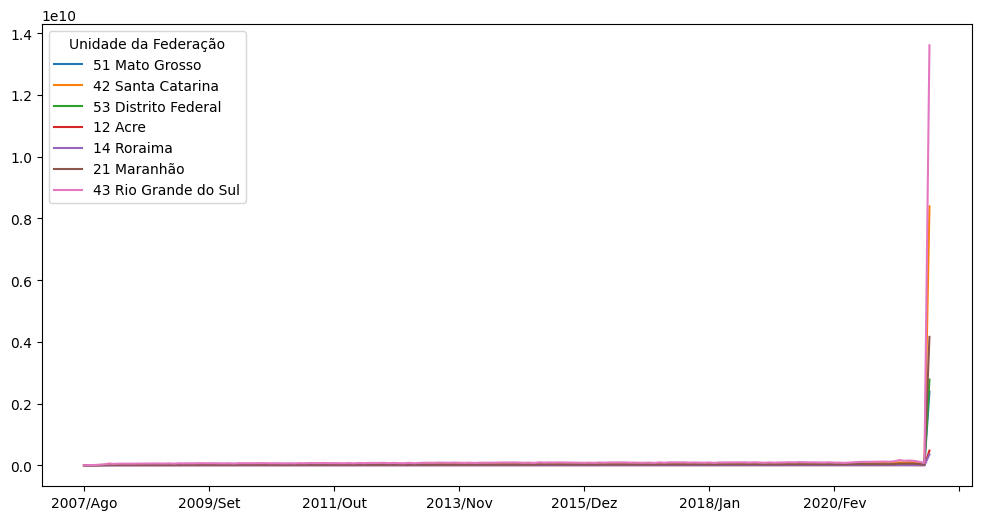

In [ ]:
# Podemos visualizar que como possui varios estados o entendimento do grafico acaba ficando confuso, portanto, com o "Sample" iremos sortear 7 estados para ser exibidos

dados_usaveis.sample(7).T.plot(figsize=(12,6))

In [ ]:
#importanto a biblioteca numpy de python conseguimos setar uma "semente" que é muito utilizada para que conseguimos gerar numeros aleatorios e para que possamos replicar o mesmo teste
#sem que o numero seja gerado novamente! Portanto, se outra pessoa utilizar a mesma semente os valores aleatorios gerados serão os mesmos !

import numpy as np

np.random.seed(524387)

dados_usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5.136475e+06,5051932.07,5200151.87,5343714.73,5344487.99,...,9.104100e+06,8.868699e+06,9.098989e+06,1.012971e+07,9.762981e+06,1.016178e+07,6.349488e+06,4.610171e+06,2.304080e+06,1.110345e+09
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,5.127930e+07,26222079.10,30716361.81,30589332.79,31424612.72,...,7.947664e+07,8.314499e+07,8.174186e+07,1.058719e+08,1.182180e+08,1.320957e+08,1.195459e+08,8.915630e+07,7.162584e+07,9.243658e+09
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,70301089.50,79119005.51,79046322.41,79268070.12,...,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08,2.189955e+10
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,1.137542e+07,9711680.20,10428191.09,10227943.00,10562148.66,...,2.033121e+07,2.183911e+07,2.041470e+07,3.158648e+07,3.236725e+07,3.255078e+07,2.601580e+07,1.997285e+07,1.522089e+07,2.450509e+09
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,1.659900e+07,10871589.62,12348758.14,12680965.13,13258411.71,...,2.070419e+07,2.174078e+07,2.332800e+07,3.219797e+07,3.090481e+07,3.960246e+07,3.314942e+07,2.492584e+07,1.616788e+07,2.796673e+09
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,7.445679e+07,33410124.06,41329594.35,42826993.62,42099192.56,...,8.764958e+07,8.821380e+07,9.687808e+07,1.178162e+08,1.159290e+08,1.342297e+08,1.205161e+08,9.569190e+07,6.164569e+07,1.049850e+10
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,5.303438e+07,24409572.92,27483480.50,27806641.44,28354279.52,...,7.926800e+07,7.523857e+07,8.203412e+07,9.258141e+07,8.997693e+07,1.016615e+08,9.305577e+07,7.053197e+07,4.888500e+07,8.392939e+09


In [ ]:
#Adicionando novamente o "Total" só que dessa vez por estado, para que seja realizado a soma dos valores de acordo com cada estado! Essa soma vai ser realizado utilizando
#um metedo de pandas que seria ".sum" que soma os valores e com o "axios" definimos qual eixo que vai ocorrer a soma


dados_usaveis["Total"] = dados_usaveis.sum(axis=1)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,2.174436e+09
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,9.505793e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,4.118591e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,7.035953e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,9.932985e+09


In [ ]:
#Desafio queremos exibir o resultado do total do maior para o menor e para que possamos realizar essa ordenação vamos realizar o seguinte codigo

ordenados_por_total = dados_usaveis.sort_values("Total", ascending=False).head() #Dessa maneira iremos exibir do maior para o menor
ordenados_por_total = ordenados_por_total.drop("Total", axis=1) #Dessa maneira estamos ocultando o total, portanto ordenamos de acordo com o total e depois removemos (maiores no topo)
ordenados_por_total.head()


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.049828e+09,1.730623e+08,1.706213e+08,1.703898e+08,1.725137e+08,...,3.286878e+08,3.386343e+08,3.614271e+08,3.528464e+08,5.029056e+08,5.044272e+08,5.481127e+08,5.031610e+08,4.043732e+08,3.019863e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.727309e+08,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.352787e+08,1.292128e+08,1.305328e+08,1.340772e+08,1.726362e+08,1.740403e+08,1.918616e+08,1.635809e+08,1.194080e+08,9.118772e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,1.176966e+08,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,7.495459e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.521758e+08,4.412816e+07,4.290791e+07,4.531559e+07,4.395135e+07,...,8.392387e+07,9.675269e+07,1.034684e+08,8.751876e+07,1.257351e+08,1.329651e+08,1.453727e+08,1.249090e+08,1.136609e+08,9.413736e+07


<Axes: >

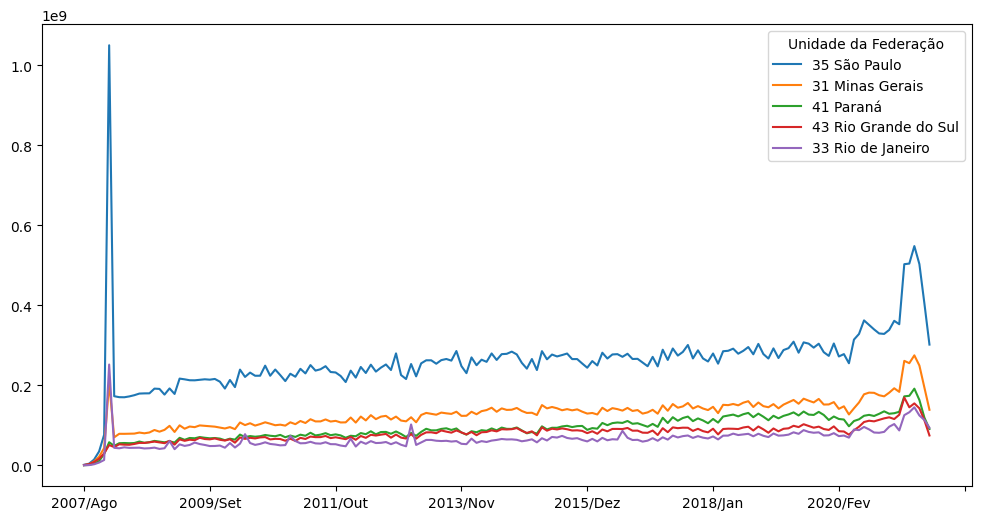

In [ ]:
ordenados_por_total.head(5).T.plot(figsize=(12,6))

In [ ]:
#Analisando o nossos dados podemos ver que no começop de 2007/ago existe um pico muito alto de numeros entrantes, E que podemos entender que pode ter ocorrido uma mudança de banco de dados
#que pode ter ocasionado que os valores foram todos adicionados nesse ano e mes em especifico, portanto, iremos remover esses meses no qual ocorreu a migração visto que eles não seguem
#um padrão para que possamos analisar

colunas_intessadas = ordenados_por_total.columns[6:] #Aqui estamos definindo que apartir da 6 colona do nosso dataframe que vai ser exibido algum valor
ordenados_por_total = ordenados_por_total[colunas_intessadas]


<Axes: >

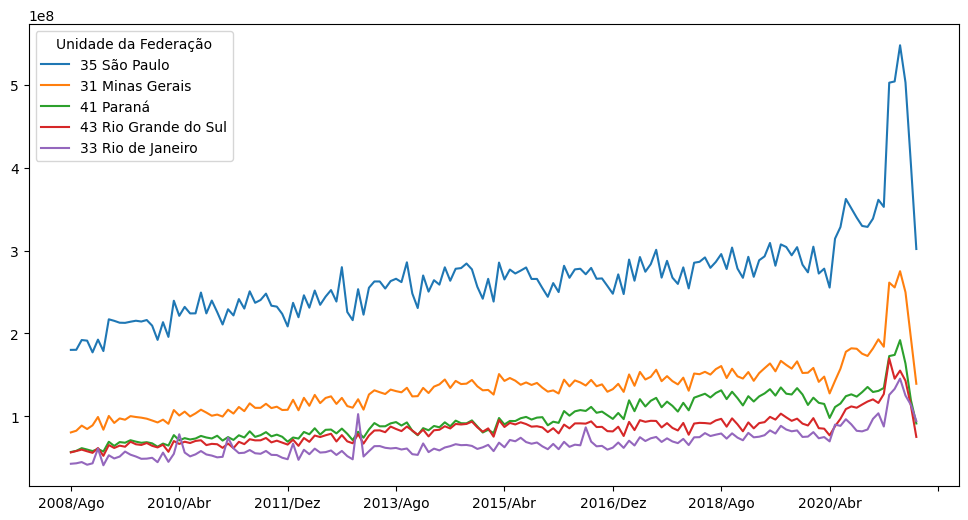

In [ ]:
ordenados_por_total.head(5).T.plot(figsize=(12,6))

<Axes: >

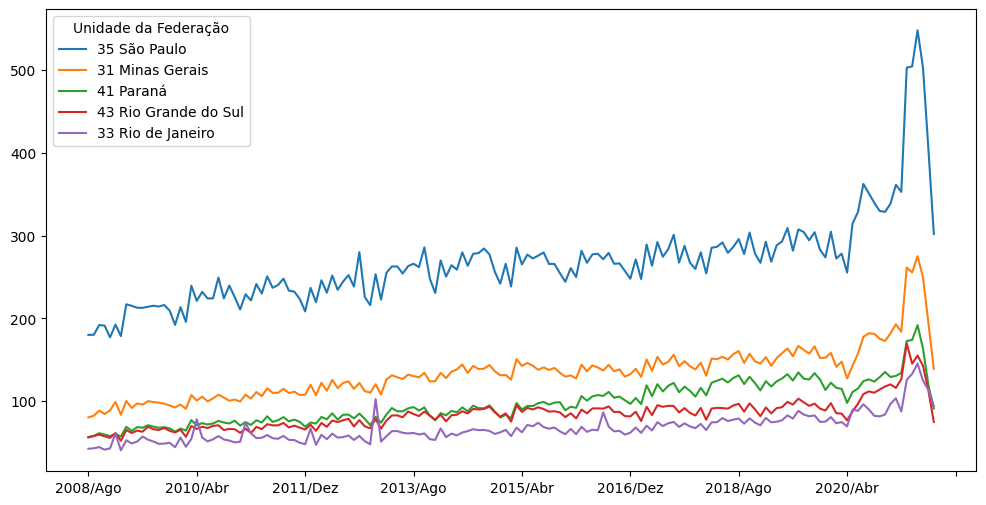

In [ ]:
#Formatando nossa tabela para deixar os valores e todas as informações o mais clara possivel, como os valores gastos na saude são altos, iremos simplificar

#Dessa forma estamos incurtando o numero e deixando que ao invés de aparecer 50000000 milhões aparece somente 500

ordenados_por_total = ordenados_por_total / 1000000
ordenados_por_total.head(5).T.plot(figsize=(12,6))

Text(0.5, 0, 'Meses')

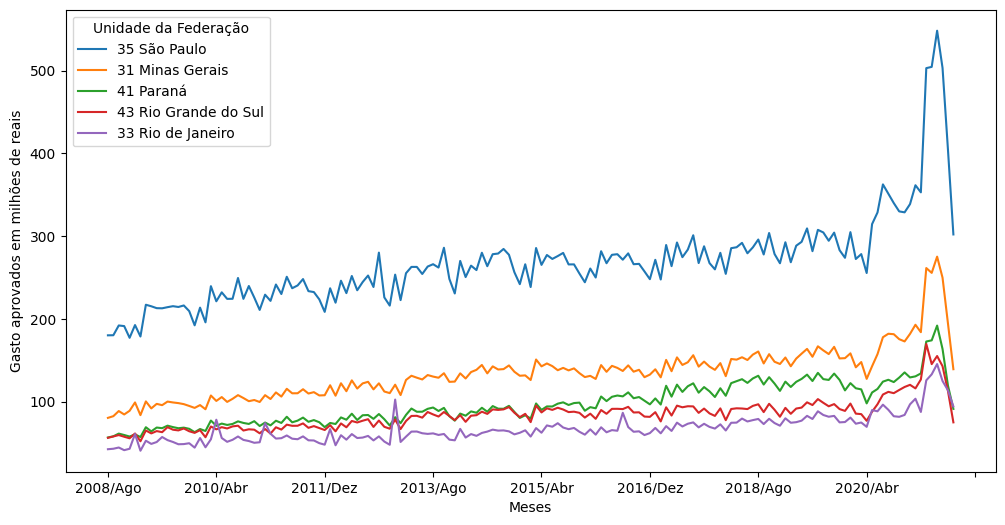

In [ ]:
#Agora iremos adicionar uma texto para explicar que os valores de 500,400 e etc é referente a milhoes

axis = ordenados_por_total.head(5).T.plot(figsize=(12,6))
axis.set_ylabel("Gasto aprovados em milhões de reais")
axis.set_xlabel("Meses")

Text(0.5, 0, 'Meses')

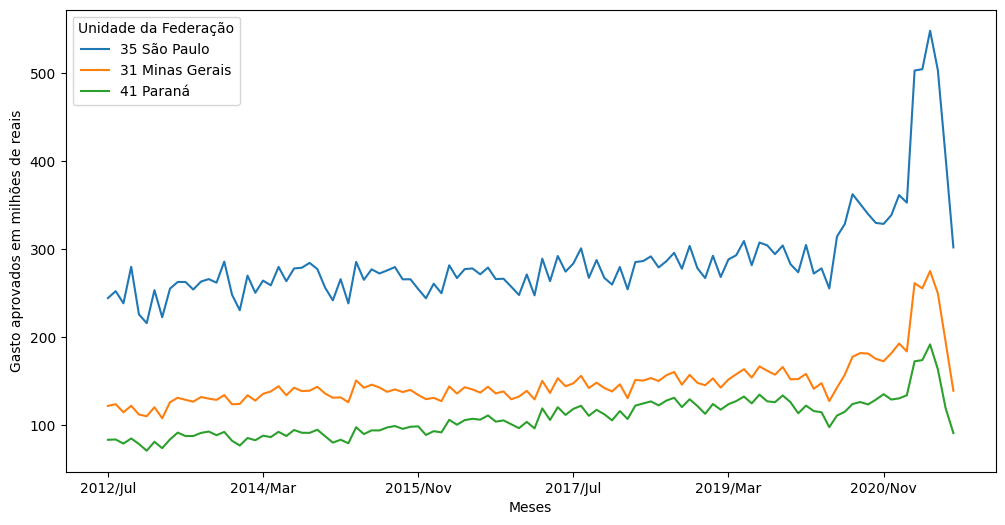

In [ ]:
#novamente iremos filtrar algumas informações da nossa tabela para que fique mais explicativa e conseguimos trabalhar e ter uma melhor visualização

meses_filtrados = ordenados_por_total.columns[47:]
axis = ordenados_por_total[meses_filtrados].head(3).T.plot(figsize=(12,6))
axis.set_ylabel("Gasto aprovados em milhões de reais")
axis.set_xlabel("Meses")

In [ ]:
#realizamos a criação dessa função já que iremos utilizar varias vezes esse codigo
def plota_gastos_por_mes(dados):
  axis = dados.T.plot(figsize=(12,6))
  axis.set_ylabel("Gasto aprovados em milhões de reais")
  axis.set_xlabel("Meses")

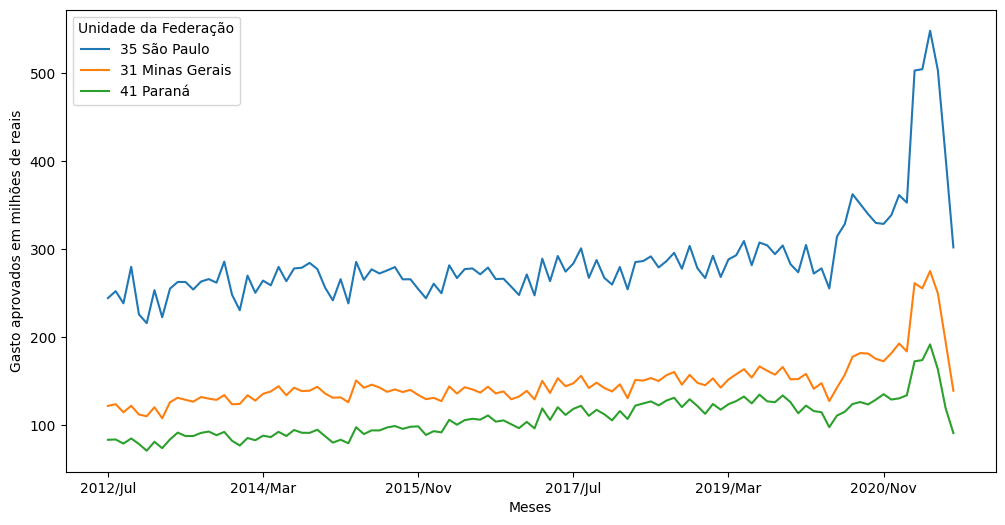

In [ ]:
plota_gastos_por_mes(ordenados_por_total[meses_filtrados].head(3))

(0.0, 600.0)

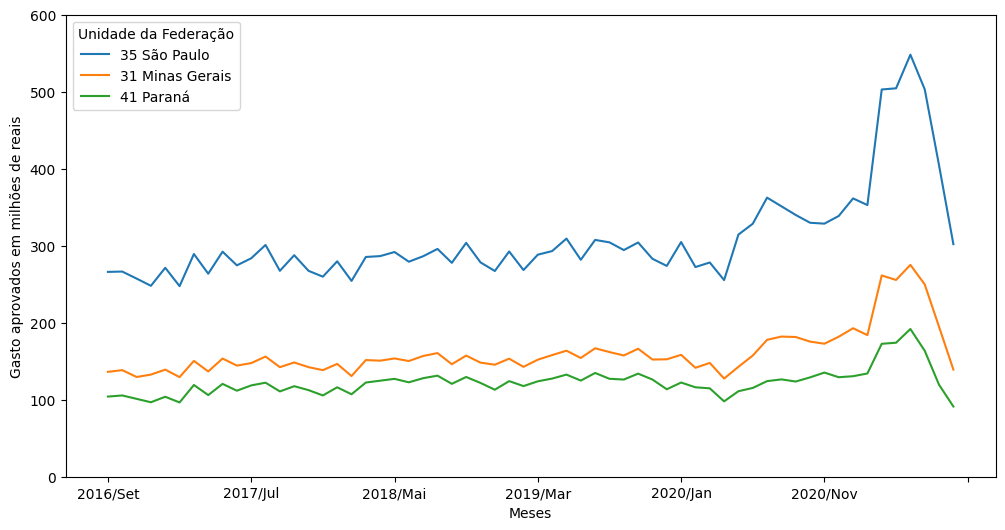

In [ ]:
#novamente estamos formando nossa tabela em cenarios de comparação, portanto, estamos filtrando para comparar apenas 3 estados e incurtando nosso dataframe com -60 colunas
plota_gastos_por_mes(ordenados_por_total[ordenados_por_total.columns[-60:]].head(3))
plt.ylim(0,600) #com essa função da biblioteca numpy de python conseguimos editar o inicio e o final da nossa tabela, dizendo para começar no 0 e exibir até 600(milhões) eixo(Y)

In [ ]:
#------------------------------------------------------------------------------------ aula 04 ---------------------------------------------------------------------------------